<a href="https://colab.research.google.com/github/emms204/Keras/blob/main/Building_a_regression_model_with_Keras_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Model Using Keras  to model the same data about concrete compressive strength

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('/content/concrete_data.csv')

In [3]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


##Visualizing our predictiors and also checking out Outliers in the predictors we can see that Age has Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

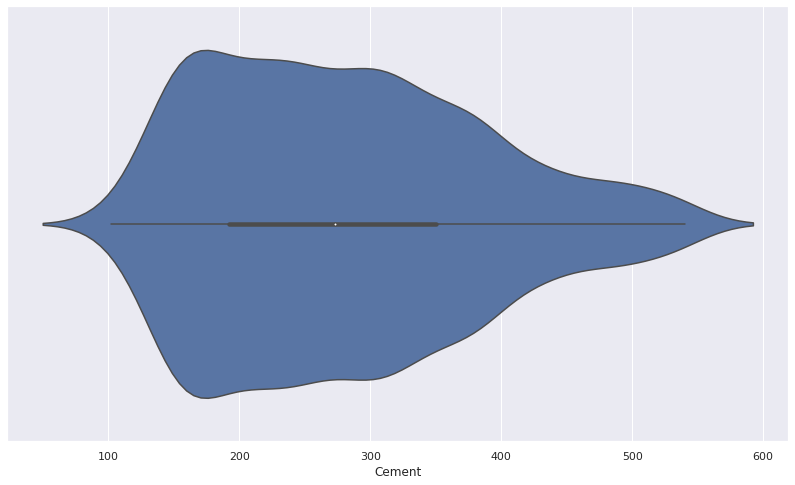

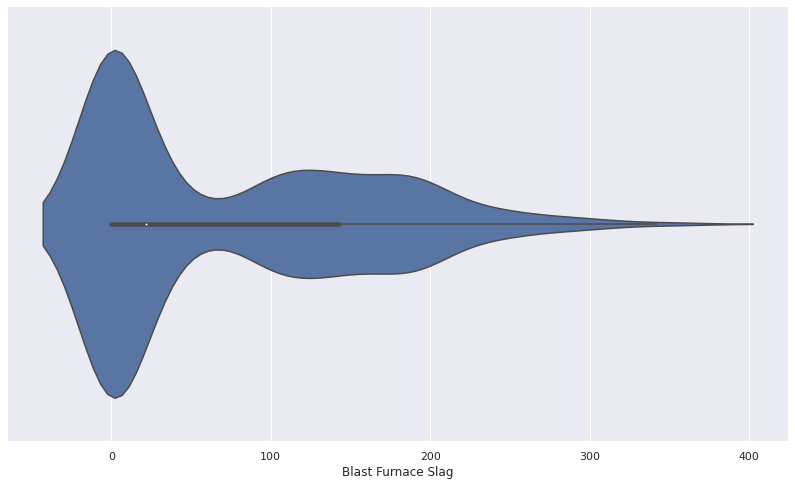

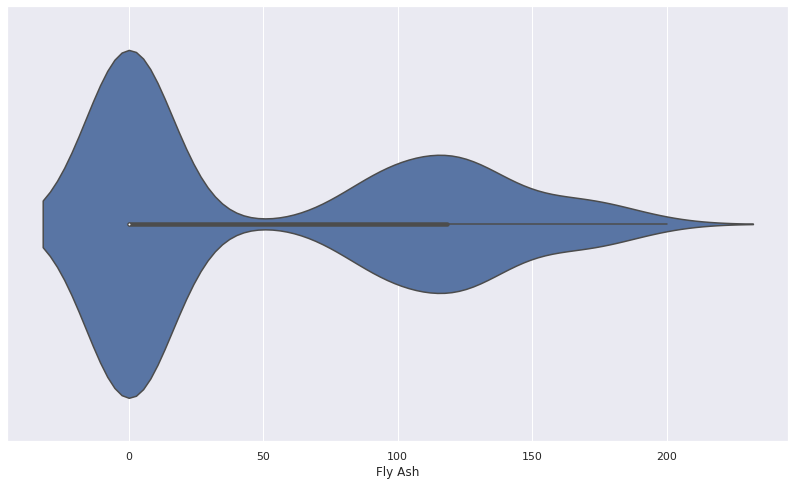

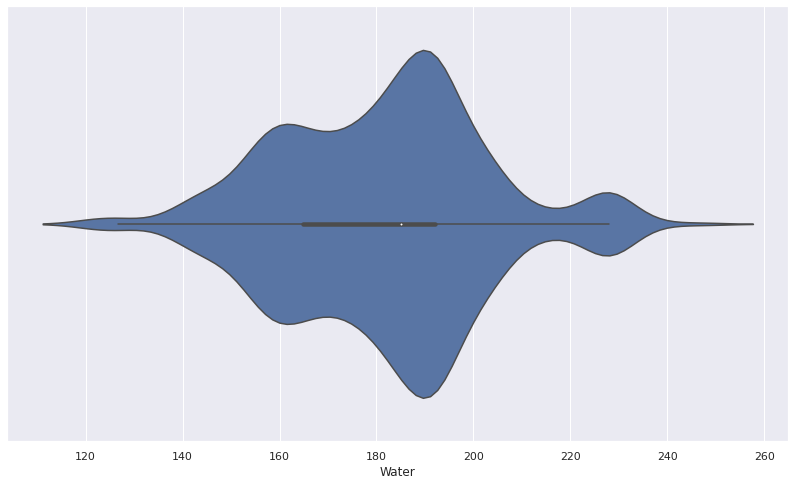

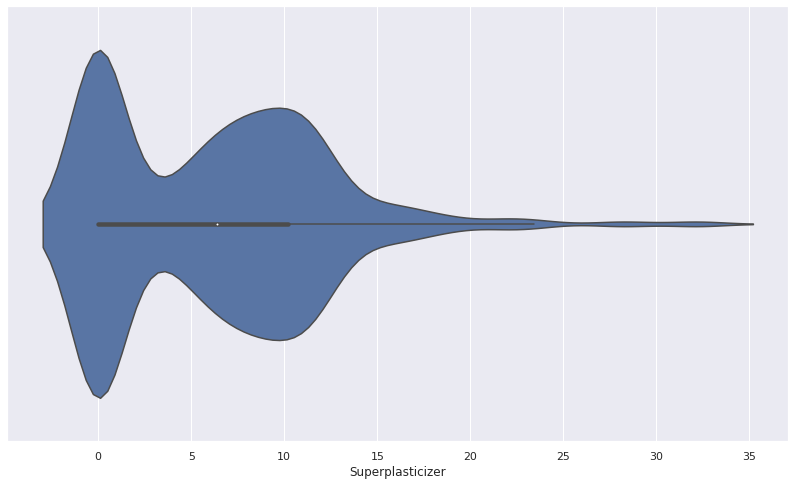

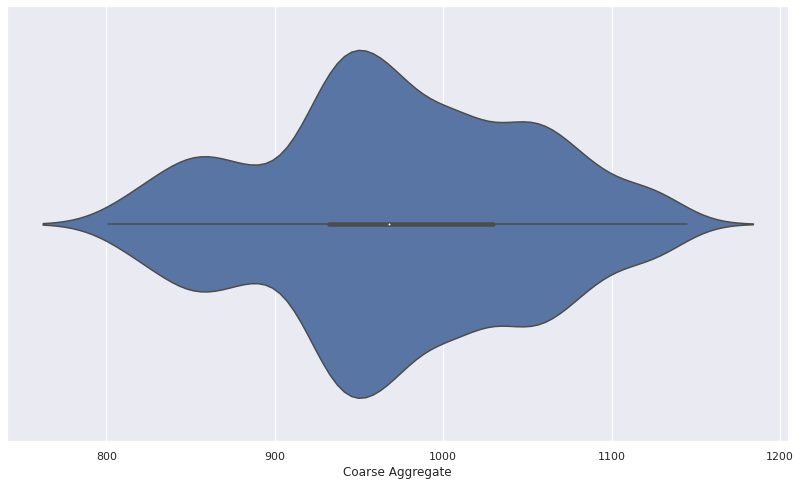

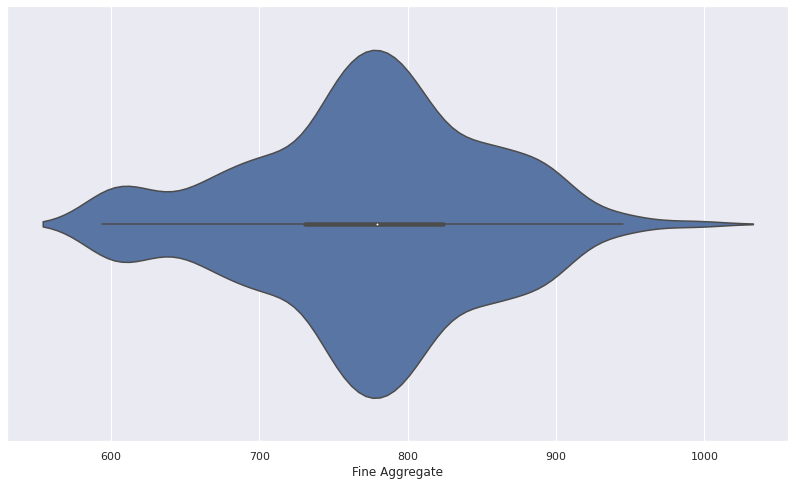

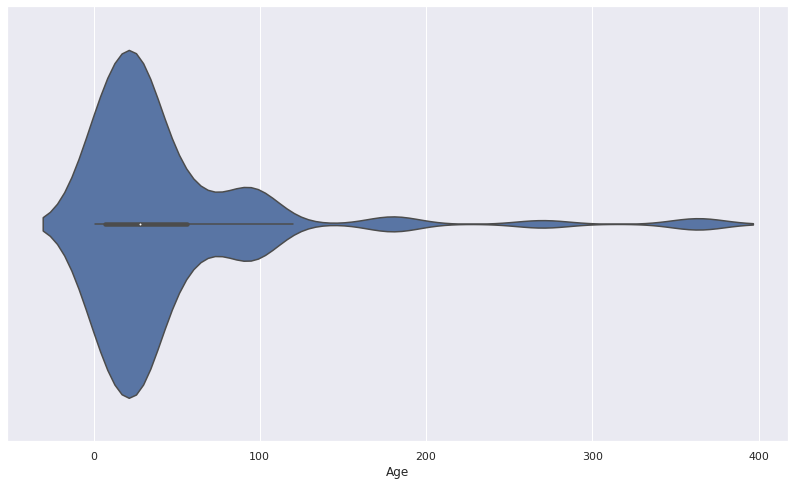

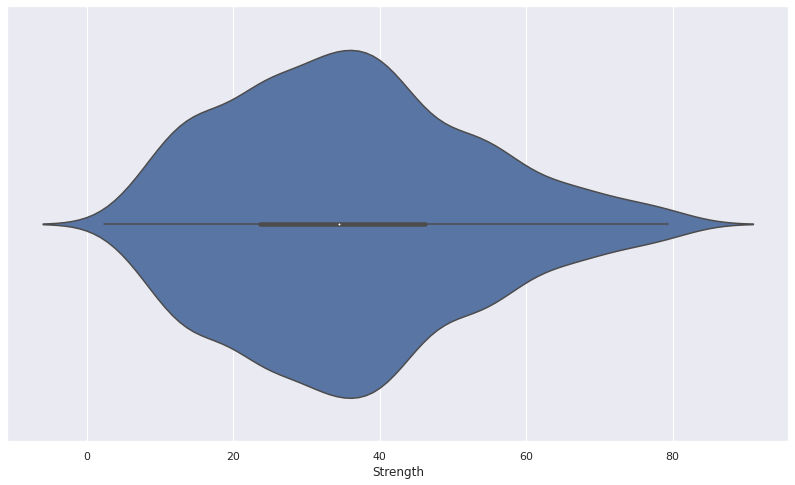

In [5]:
for i in data.columns:
  plt.figure(figsize=(14,8))
  sns.violinplot(data[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

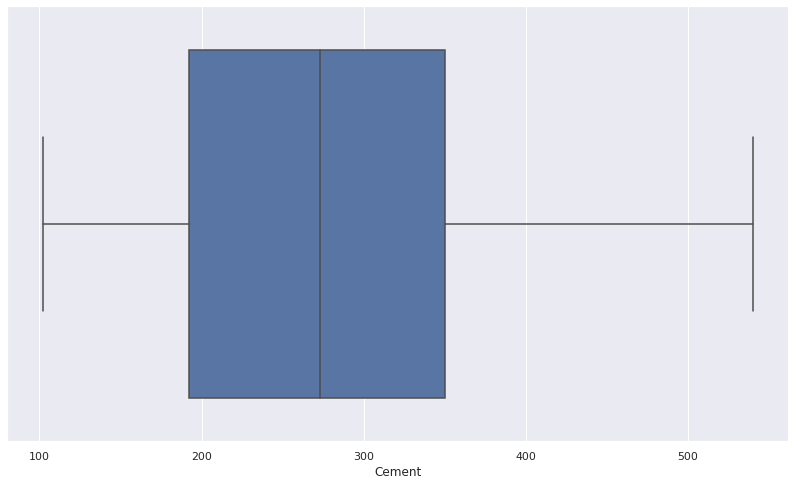

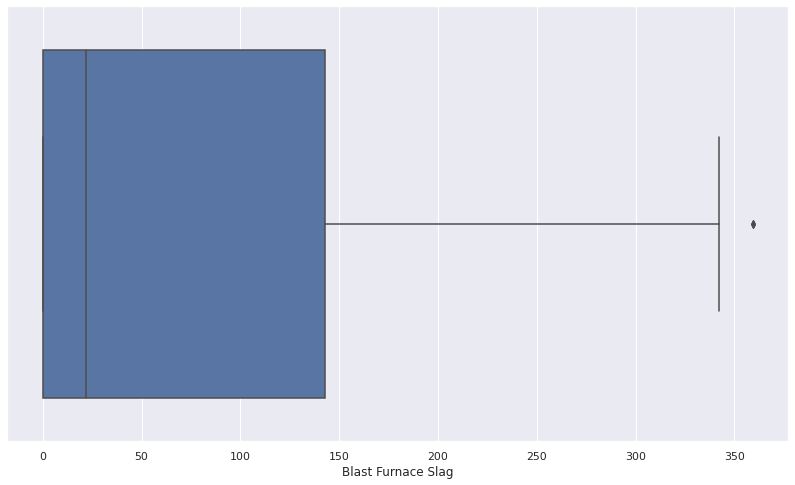

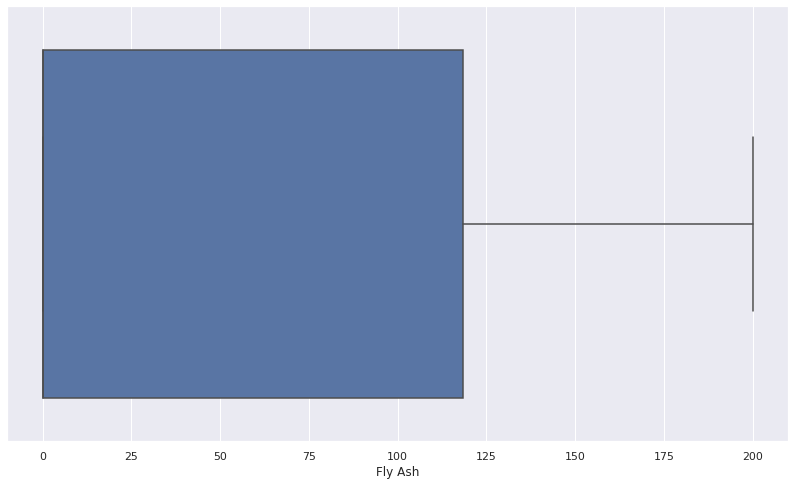

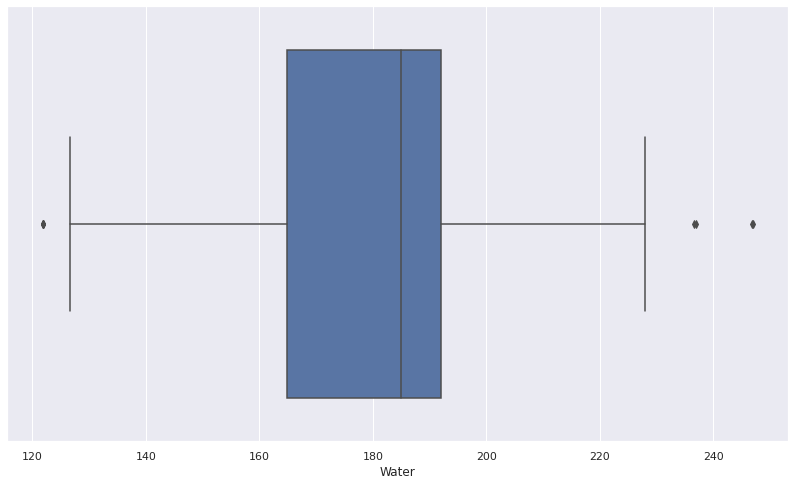

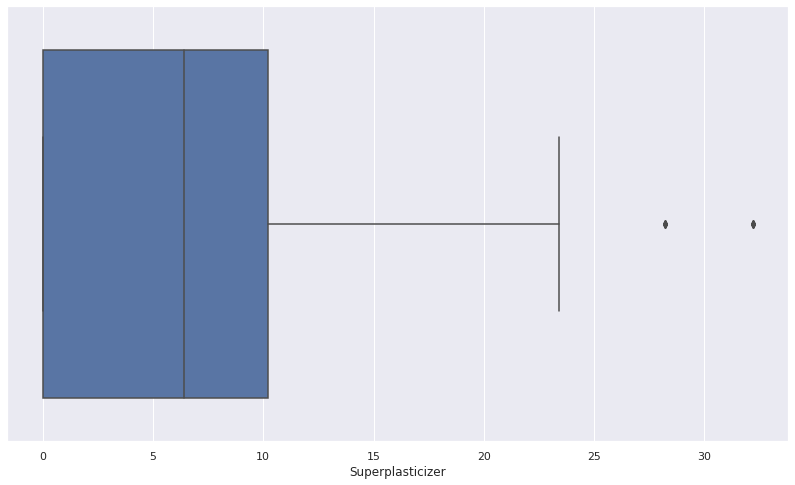

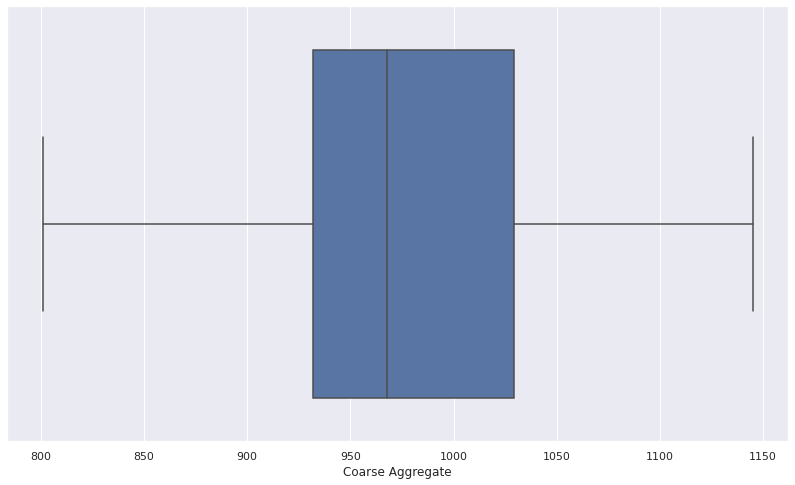

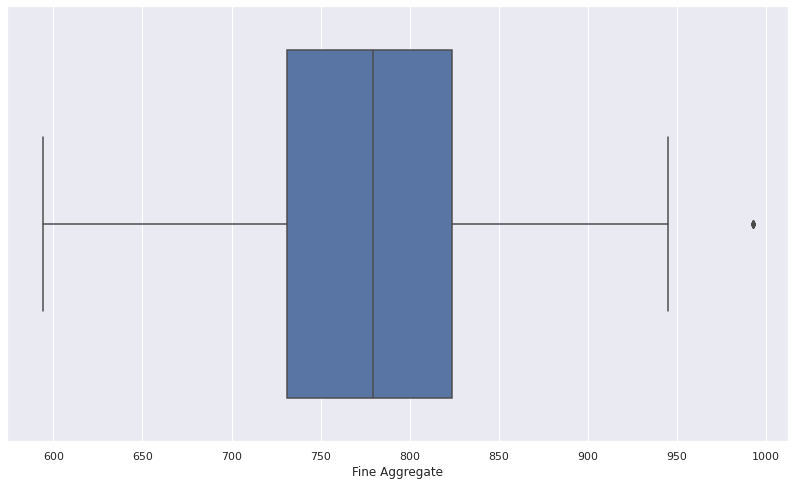

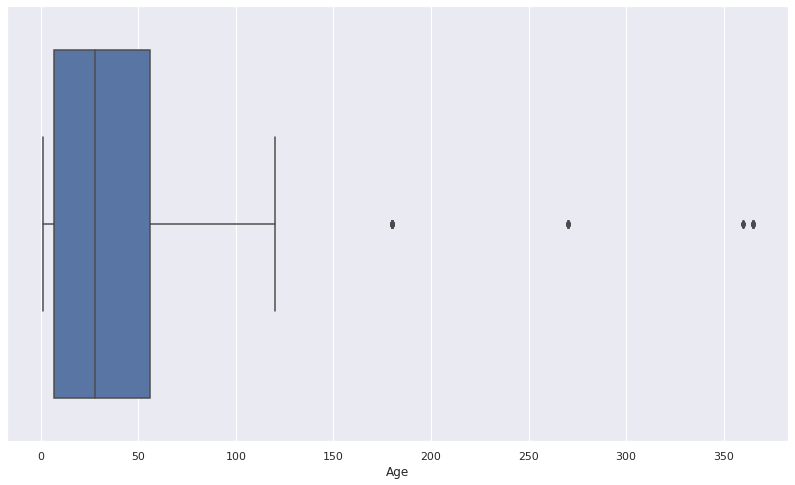

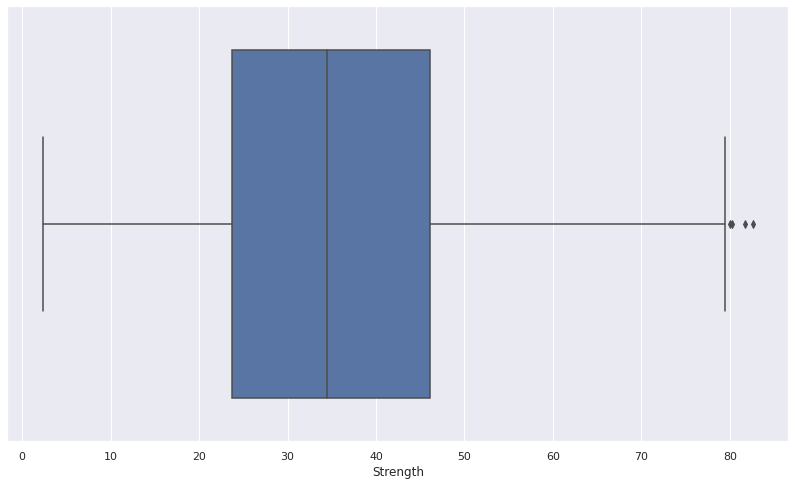

In [6]:
for i in data.columns:
  plt.figure(figsize=(14,8))
  sns.boxplot(data[i])

In [7]:
print(data['Age'].quantile(0.10))
print(data['Age'].quantile(0.90))

3.0
100.0


In [8]:
data['Age'] = np.where(data['Age']<3.0, 3.0, data['Age'])
data['Age'] = np.where(data['Age']>100.0, 100.0, data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


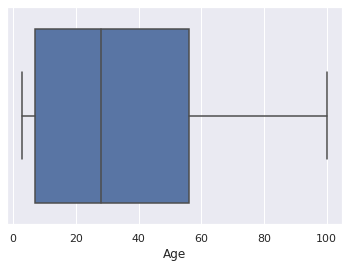

In [9]:
sns.boxplot(data['Age'])

##After running the Test set it seems Our neural nets aren't really affected by outliers

##Visualizing the relationships between our columns 

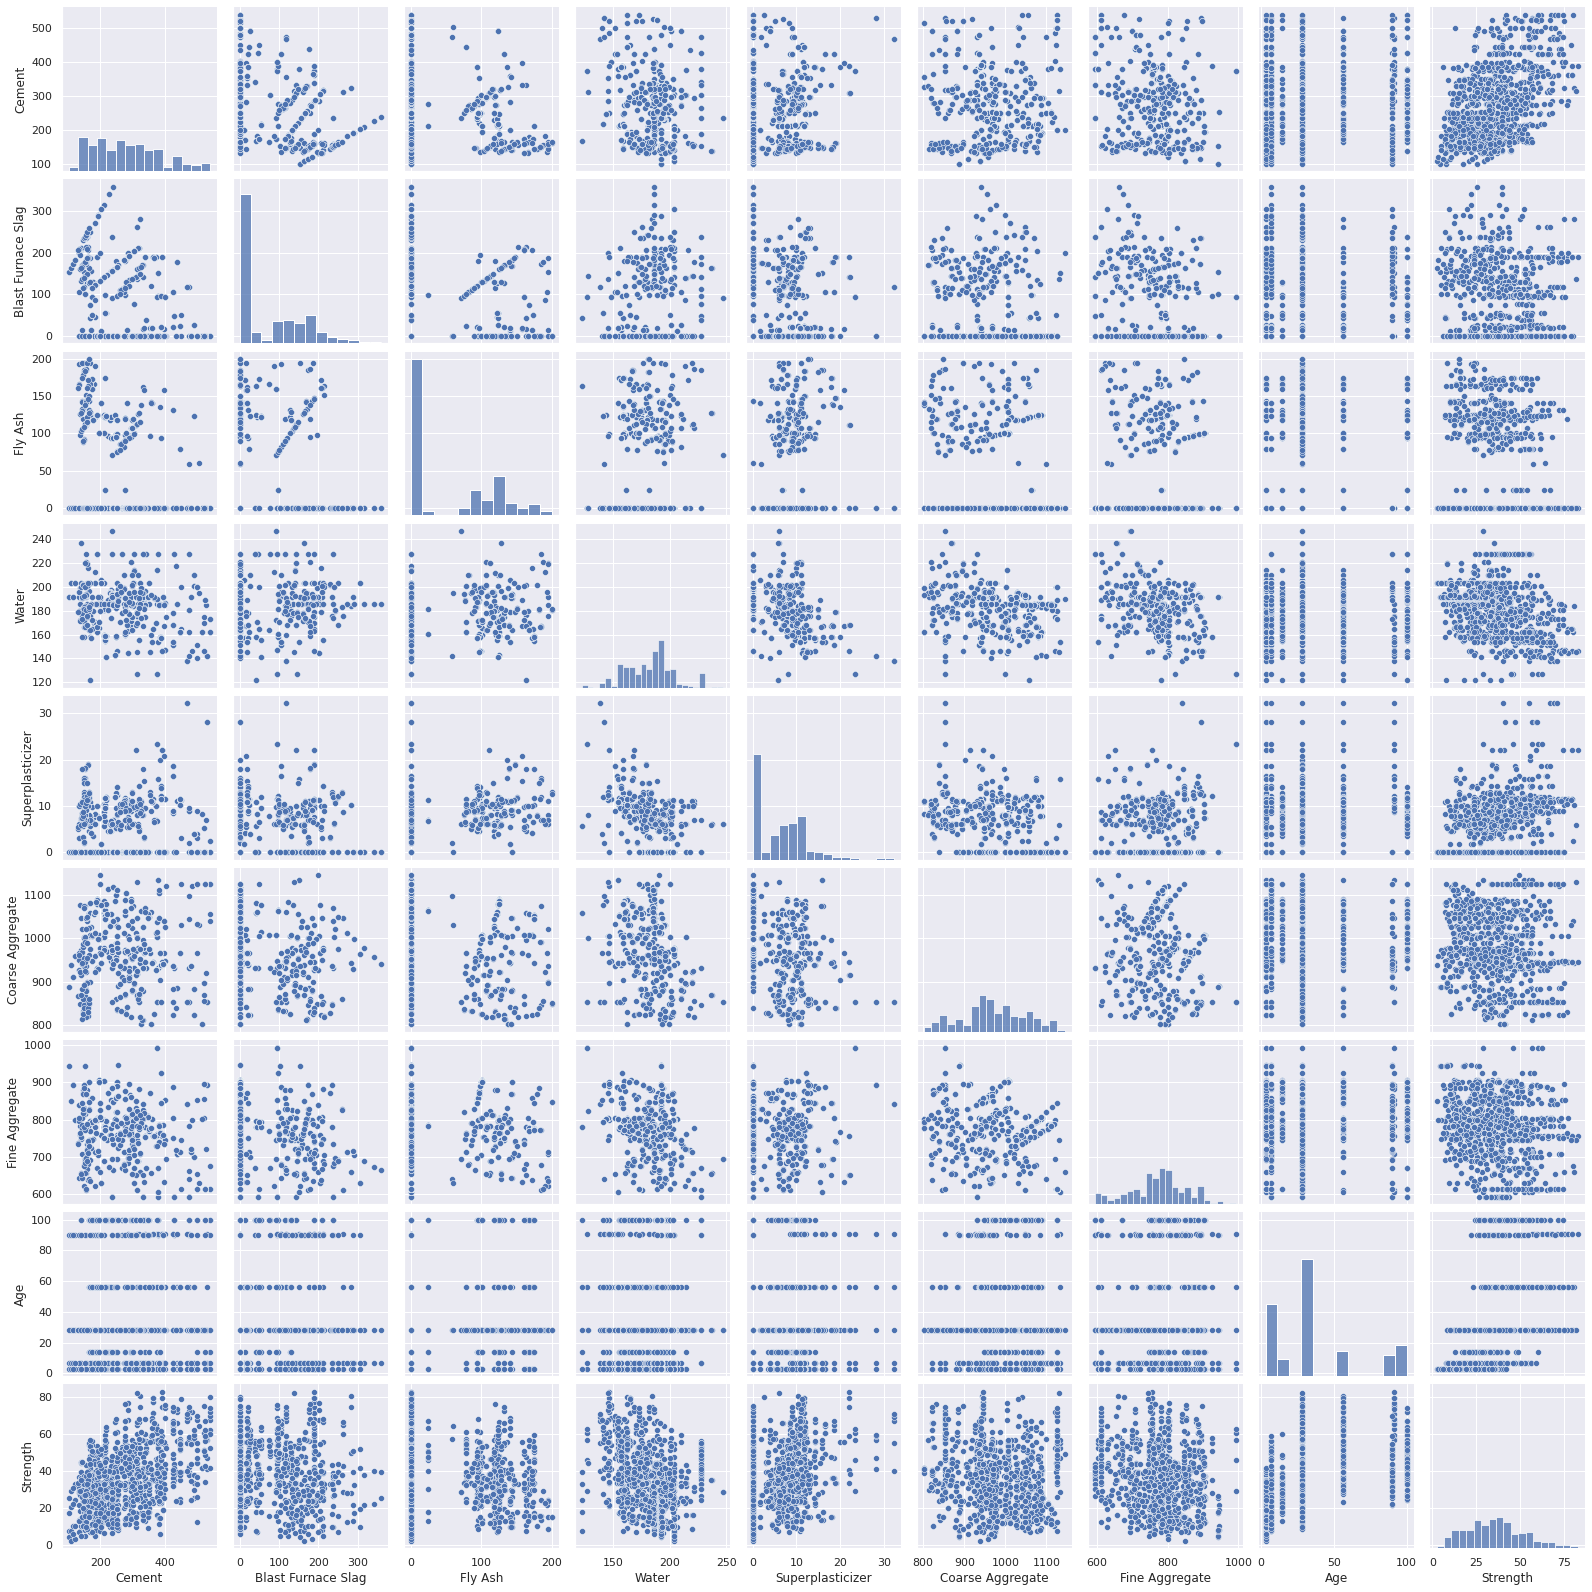

In [10]:
sns.pairplot(data[data.columns])

##Cement and Strength seem to have a strength linear relationship

## Training the Model

In [11]:
X = data.loc[:,data.columns!='Strength']
y = data['Strength']

In [12]:
X_norm = (X - X.mean())/X.std()
X_norm

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.262088
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.262088
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,2.004286
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,2.004286
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,2.004286
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.262088
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.262088
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.262088
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.262088


In [44]:
n_cols = X_norm.shape[1]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, shuffle=True, random_state=42)

In [47]:
def regression_model():
  model = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation='relu', input_shape=(n_cols,)),
                               tf.keras.layers.Dense(1)
  ])
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model


In [48]:
model = regression_model()

In [49]:
model.fit(X_train, y_train, epochs=100, verbose=0)

##Testing Model on Test data

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
preds= model.predict(X_test)

In [52]:
print(mean_squared_error(y_test,preds))

98.23356332024444


##Train and Test the model

In [43]:
from sklearn.model_selection import KFold

In [55]:
model_mse = []
fold = KFold(n_splits=50)
for train_index,test_index in fold.split(X_norm,y):
  X_train_1, X_test_1 = X_norm.iloc[train_index],X_norm.iloc[test_index]
  y_train_1, y_test_1 = y.iloc[train_index],y.iloc[test_index]
  
  model_1 = regression_model()
  model_1.fit(X_train_1, y_train_1, epochs=100, verbose=0)
  pred_1 = model_1.predict(X_test_1)
  model_mse.append(mean_squared_error(y_test_1,pred_1))

print("The Mean Squared Error of 50 iterations is",np.mean(model_mse))
print("The Standard Deviation of 50 iterations is",np.std(model_mse))

The Mean Squared Error of 50 iterations is 101.31558621085722
The Standard Deviation of 50 iterations is 53.22094270518106


In [56]:
model_mse

[142.4464758779454,
 113.91909413254878,
 76.08336970179441,
 212.23825531628722,
 114.586129181327,
 95.99254907394067,
 183.2014389978766,
 185.7668649578657,
 122.62041337064518,
 25.37607167897514,
 217.88111057287284,
 143.64860405915246,
 44.651340289824894,
 47.71765259303591,
 100.39117402930445,
 100.38520032711388,
 153.65550756636688,
 119.130825212493,
 278.522734054261,
 145.0452262280677,
 158.96081969726538,
 147.57999339946224,
 65.3423889003007,
 64.81323896886245,
 126.25261603443936,
 63.16306540262035,
 66.19242326258959,
 74.25011139400763,
 38.57775330078495,
 39.860767519081236,
 57.366567288711714,
 60.4955347028868,
 52.4029767759928,
 52.83957379028412,
 50.39282747476426,
 75.73455736976642,
 53.46148472652146,
 36.11363915846471,
 77.33332531947886,
 74.92574370234931,
 122.30478033281881,
 110.07159476659595,
 54.15237922642716,
 144.19998018549555,
 68.92016724433485,
 78.75922762433706,
 124.94851259894172,
 67.64394501168341,
 141.35834962124366,
 94.100